## mini-bach版交叉熵误差的实现

In [ ]:
# t为one-hot形式
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y,reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))/batch_size

0.1999999999990898
0.2999999999986347


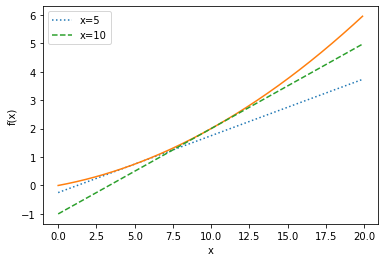

In [12]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x#y为偏置
    return lambda t: d*t + y

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
tf1 = tangent_line(function_1, 5)
y2 = tf1(x)
tf2 = tangent_line(function_1,10)
y3 = tf2(x)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x,y2,linestyle=':',label='x=5')
plt.plot(x,y)
plt.plot(x,y3,linestyle='--',label='x=10')
plt.legend()
plt.show()

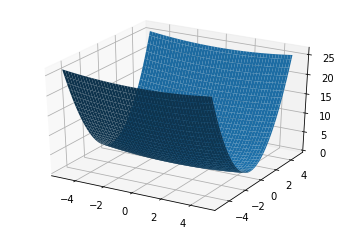

In [102]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

def function_2(x):
    return (1/20)*x[0]**2 + x[1]**2
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp = x[index]
        #f(x+h)的计算
        x[index] = tmp + h
        fxh1 = f(x)
        
        #f(x-h)的计算
        x[index] = tmp -h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp
    return grad

x1 = np.arange(-5.0,5.0,0.1)
x2 = np.arange(-5.0,5.0,0.1)
x ,y = np.meshgrid(x1,x2)
X = np.array([x,y])
z = function_2(X)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, z) 

plt.show()

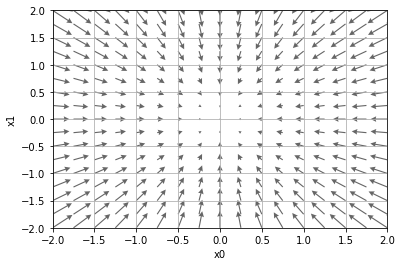

In [58]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666",headwidth=5,scale=80)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

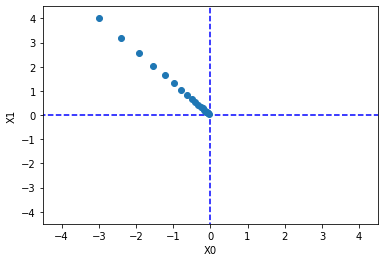

In [79]:
def gradient_descent(f,inti_x,lr = 0.01,step_num = 100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
x,x_history = gradient_descent(function_2,init_x,lr = 0.1,step_num = 20)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [88]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        #符合标准正态分布的2*3矩阵
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
#正解标签
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.49239065  0.07843706 -0.57082771]
 [ 0.73858597  0.11765559 -0.85624156]]


## 两层神经网络的手写数字识别

In [ ]:
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def _init_(self,input_size,hidden_size,output_size,weight_init_std = 0.01):
        #初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.['b1'],self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax（a2）
        
        return y
    #计算损失函数
    #x输入数据，t,监督数据
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error
    
    def accuracy(self,x,t):
        y = self.predict
        y = np.argmax(y,axis = 1)
        t = np.argmax(t,axis = 1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)
        
        grads={}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads

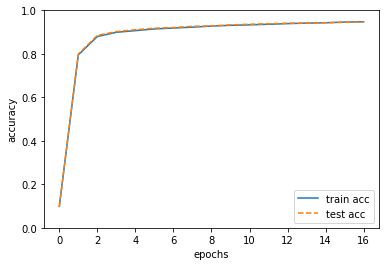

In [100]:
import numpy as py
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) =  load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
train_acc_list = []
test_acc_list = []
#平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size,1)
#超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size = 50,output_size = 10)

for  i in range(iters_num):
    #获取mini-batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #计算梯度
    grad = network.gradient(x_batch,t_batch)
    
    #更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #记录学习过程
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
#绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()